É interessante utilizar a historia traçando das abas de Processamento > Produção > Exportação

Dessa forma da pra realizar uma história do começo ao destino. Se atentar de pegar somente vinhos.

In [1]:
import pandas as pd

In [2]:
comercio = pd.read_csv('/content/Comercio.csv',sep=';')


In [3]:
comercio = comercio.drop(columns=['id'], errors='ignore')

In [4]:
comercio.head()

,control,Produto,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,VINHO DE MESA,VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,140813114,...,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,116609545,...,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,15195525,...,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,9008044,...,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
4,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,14975330,...,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [5]:
comercio_pivot = pd.melt(comercio,id_vars=['control','Produto'],var_name='Ano',value_name='Quantidade')

In [6]:
comercio_pivot.tail()

,control,Produto,Ano,Quantidade
3343,ou_Vinho_base,Vinho base para espumantes,2023,0
3344,ou_Vinho_composto,Vinho composto,2023,981
3345,ou_Vinho_licoroso,Vinho licoroso,2023,421974
3346,ou_Vinho_leve,Vinho leve,2023,132064
3347,ou_Vinho_gaseificado,Vinho gaseificado,2023,410215


In [7]:
exploration = comercio_pivot[comercio_pivot.isnull().any(axis=1)] #Pegando todos os valores nulos
exploration.head() #Verificando valores nulos

,control,Produto,Ano,Quantidade
25,NaN,OUTROS PRODUTOS COMERCIALIZADOS,1970,19844550
87,NaN,OUTROS PRODUTOS COMERCIALIZADOS,1971,20351384
149,NaN,OUTROS PRODUTOS COMERCIALIZADOS,1972,23615205
211,NaN,OUTROS PRODUTOS COMERCIALIZADOS,1973,25401454
273,NaN,OUTROS PRODUTOS COMERCIALIZADOS,1974,24530878


In [8]:
#Ajustando a coluna Control e colocando onde estar NaN como Outros
comercio_pivot['control'] = comercio_pivot['control'].fillna('Outros')

In [13]:
comercio_pivot['Ano'] = comercio_pivot['Ano'].astype(int)

In [14]:
comercio_pivot = comercio_pivot[comercio_pivot['Ano'] >= 2009]

In [21]:
comercio_pivot['control'] = comercio_pivot['control'].str.lower()
comercio_pivot = comercio_pivot[comercio_pivot['control'].str.contains('vinho')]

In [23]:
comercio_pivot.head(10)

,control,Produto,Ano,Quantidade
2418,vinho de mesa,VINHO DE MESA,2009,234525979
2422,vinho fino de mesa,VINHO FINO DE MESA,2009,33080270
2426,vinho frizante,VINHO FRIZANTE,2009,1003596
2427,vinho orgânico,VINHO ORGÂNICO,2009,0
2428,vinho especial,VINHO ESPECIAL,2009,113
2444,ou_outros vinhos (sem informdetalhada,Outros vinhos (sem informação detalhada),2009,0
2474,ou_vinho_acetificado,Vinho acetificado,2009,808389
2475,ou_vinho_base,Vinho base para espumantes,2009,10649
2476,ou_vinho_composto,Vinho composto,2009,542123
2477,ou_vinho_licoroso,Vinho licoroso,2009,591313


In [24]:
comercio_pivot.to_excel('comercio_pivot.xlsx')

# Ideias


In [25]:
Quantidade_Ano = comercio_pivot.groupby('Ano')['Quantidade'].sum()
Quantidade_Ano = pd.DataFrame(Quantidade_Ano)
Quantidade_Ano = Quantidade_Ano.reset_index()
Quantidade_Ano['Ano'] = Quantidade_Ano['Ano'].astype(int) #Transformando o Ano em inteiro para poder realizar o filtro abaixo
Quantidade_Ano = Quantidade_Ano[Quantidade_Ano['Ano'] >= 2009] #Pegando os utilimos 15 anos

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

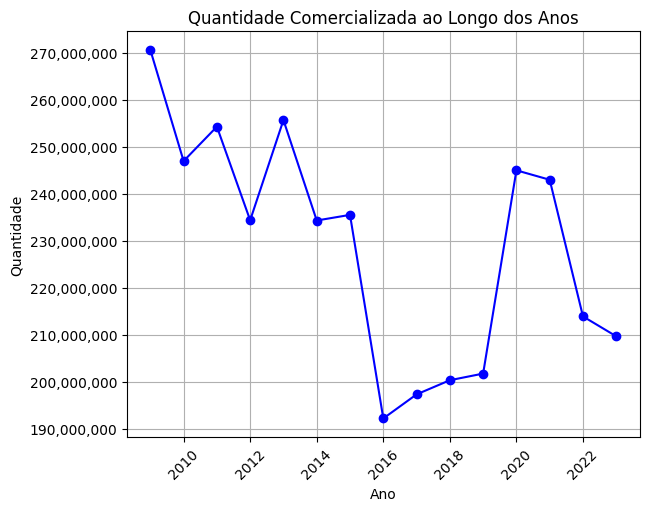

In [27]:
plt.plot(Quantidade_Ano['Ano'], Quantidade_Ano['Quantidade'], marker='o', linestyle='-', color='b')#Adicionei o formatter analisar se vai dar erro
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('Quantidade_Ano.png') #Salvar Imagem
plt.title('Quantidade Comercializada ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()


# Graficos

In [30]:
import altair as alt

# Exemplo de DataFrame agregado_processa já criado
# Criar o gráfico de linhas com uma paleta de cores personalizada
chart = alt.Chart(Quantidade_Ano).mark_line().encode(
    x='Ano:O',  # 'O' indica que o Ano é tratado como ordinal
    y='Quantidade:Q',
    color=alt.Color(scale=alt.Scale(scheme='set1'))  # Alterar a paleta de cores
).properties(
    width=800,  # Definir a largura do gráfico
    height=500,  # Definir a altura do gráfico
    title='Quantidade em Litros Comercializada por Ano'
)


# Exibir o gráfico
chart


alt.Chart(...)